### Assignment 6

**Deadline: 4/22/2024 before midnight**

YOUR NAME: Hasan Mashrique

---
In this assignment, we analyze the diabetes dataset to predict the onset of diabetes based on diagnostic measures. We employ machine learning models, specifically K-nearest neighbors (KNN) and a dummy classifier, to evaluate their performance.

In [147]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [129]:
import pandas
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [130]:
diabetes.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
452,0,91,68,32,210,39.9,0.381,25,0
177,0,129,110,46,130,67.1,0.319,26,1
741,3,102,44,20,94,30.8,0.400,26,0


In [131]:
len(diabetes)

768

---
## **Problem 1**

Construct a KNN classifier with 7 nearest neighbors. to predict the Outcome of the dataset.

To predict the Outcome variable, use all of the othe variables as features.  

Features must be standardized before training the KNN model because distance-based algorithms are sensitive to the scale of the data.

Use the `train_test_split` method with a `random_state` of 1234, allocating 97% of the data for training and 3% for testing.

## Solution 1

In [132]:
## define the input and output features

y = diabetes['Outcome']

X = diabetes.drop(columns=['Outcome'])

X_analyze= X     ## for problem 2 analysis

X = pandas.DataFrame(
    data = StandardScaler().fit_transform(X),
    columns = X.columns,
)

In [133]:
X.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
193,2.124780,0.441461,-3.572597,-1.288212,-0.692891,2.577403,0.320506,0.575118
29,0.342981,-0.121888,1.183596,-1.288212,-0.692891,0.267472,-0.407342,0.404942
759,0.639947,2.162804,1.183596,-1.288212,-0.692891,0.445159,-0.585529,2.787399


In [134]:
y.sample(3)

228    0
129    1
61     1
Name: Outcome, dtype: int64

In [135]:
## split the data into train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1234)

In [136]:
## define the KNN classifier and fit the data

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [137]:
len(y_test)

24

---
## **Problem 2**

Extract and display the features and target variable from the test set before standardization to analyze their distributions and characteristics.


In [138]:
# split the data into train test before normalizing them

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_analyze, y, test_size=0.03, random_state=1234)

In [139]:
X_test1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
200,0,113,80,16,0,31.0,0.874,21
40,3,180,64,25,70,34.0,0.271,26
630,7,114,64,0,0,27.4,0.732,34
356,1,125,50,40,167,33.3,0.962,28
305,2,120,76,37,105,39.7,0.215,29
267,2,128,64,42,0,40.0,1.101,24
351,4,137,84,0,0,31.2,0.252,30
644,3,103,72,30,152,27.6,0.730,27
759,6,190,92,0,0,35.5,0.278,66
157,1,109,56,21,135,25.2,0.833,23


#### Range for `BMI` and `Glucose`

In [140]:
range_BMI= X_test1['BMI'].max() - X_test1['BMI'].min()

range_BMI

22.2

In [141]:
range_glucose= X_test1['Glucose'].max() - X_test1['Glucose'].min()

range_glucose

119

#### Distribution of `BMI` and `Glucose`

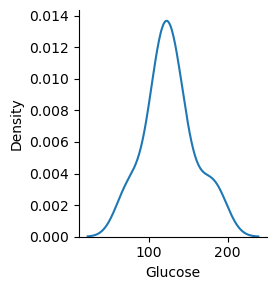

In [142]:
sns.displot(data=X_test1, x='Glucose', kind='kde', height=3)

plt.show()

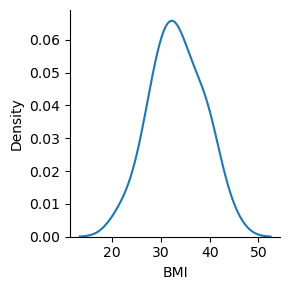

In [143]:
sns.displot(data=X_test1, x='BMI', kind='kde', height=3)

plt.show()

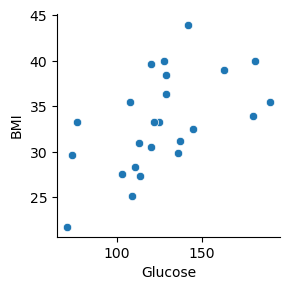

In [149]:
sns.relplot(data=X_test1, 
                x='Glucose', 
                y='BMI', 
                kind= 'scatter',
               # style='Gender_Male',
               # hue= 'cluster', 
                height=3)

In [95]:
y_test1

200    0
40     0
630    1
356    1
305    0
267    0
351    0
644    0
759    1
157    0
606    1
449    0
473    0
461    0
169    0
718    0
230    1
666    1
234    0
539    1
100    1
693    1
534    0
131    1
Name: Outcome, dtype: int64

In [96]:
## the distribution of the outcome variable for test data

y_test1.value_counts(1)

0    0.583333
1    0.416667
Name: Outcome, dtype: float64

---
## **Problem 3**

Utilize the KNN model to predict the test set outcomes and display these predictions.

## Solution 3

In [97]:
## predicting the test data with the 7 neighbour knn model (test data from problem 1)

predictions= knn_model.predict(X_test)

In [98]:
len(predictions)

24

In [99]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

---
## **Problem 4**

What does this function do?  Explain using predictions of the test data obtained in Problem 1.

```python
def get_posneg_indices( predictions ):
    pidx = [ i for i in range(len(predictions)) if predictions[i]==1 ]
    nidx = [ i for i in range(len(predictions)) if predictions[i]==0 ]
    return pidx, nidx
```

## Solution 4

The function defines two lists comprehensions `pidx` and `nidx`. 

- List `pidx` takes the indexes of the positive outcomes (1) of the predictions.
- List `nidx` takes the indexes of the negative outcomes (0) of the predictions.

Finally the function returns the two lists `pidx` and `nidx`.

---
## **Problem 5**

Use `get_posneg_indices` to calculate the number of true positives, false postives, true negatives, and false negatives, when the KNN model in Problem 1 makes predictions with the testing data in Problem 1.

## Solution 5

In [100]:
def get_posneg_indices( predictions ):
    
    pidx = [ i for i in range(len(predictions)) if predictions[i]==1 ]
    nidx = [ i for i in range(len(predictions)) if predictions[i]==0 ]
    
    return pidx, nidx


In [101]:
pred_pos, pred_neg= get_posneg_indices(predictions)

In [102]:
pred_pos , pred_neg

([1, 3, 10, 12, 16, 19, 20, 23],
 [0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 18, 21, 22])

In [103]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

In [107]:
len(pred_pos), len(y_test)

(8, 24)

In [109]:
actual_pos=[]

for i in range(len(pred_pos)):
    actual_pos.append(y_test[pred_pos[i]])
    
actual_pos    

KeyError: 1

In [ ]:
predictions[pred_pos]

In [ ]:
actual_neg=[]

for i in range(len(pred_neg)):
    actual_neg.append(y_test[pred_neg[i]])
    
actual_neg

In [ ]:
predictions[pred_neg]

Here, we calculated the predicted 1's and actual 1's and also the predicted 0's and actual 0's separately to compare the predictions.

We also have the actual outcome labels in `y_test` and our predicted outcome labels in `predictions`. We can compare these two outputs and find true positives, false postives, true negatives, and false negatives.

In [110]:
actual_y= y_test.to_list()

actual_y

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]

In [111]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

In [112]:
## pairing the actual outcome and predicted outcome to find prediction accuracy

true_pred =list(zip(actual_y, predictions))

for item in true_pred:
    print(item, end=' ')

(0, 0) (0, 1) (1, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (1, 0) (0, 0) (1, 1) (0, 0) (0, 1) (0, 0) (0, 0) (0, 0) (1, 1) (1, 0) (0, 0) (1, 1) (1, 1) (1, 0) (0, 0) (1, 1) 

From the predictions and actual data above,

- TP = 1 1 1 1 1 1 = 6
- FP = 1 1 = 2
- TN = 1 1 1 1 1 1 1 1 1 1 1 1 = 12  
- FN = 1 1 1 1 = 4


---
## **Problem 6**

Calculate and report the accuracy, precision, and recall of the KNN model using the predictions and actual outcomes of the test data. These metrics are crucial for understanding the effectiveness of the model in predicting diabetes onset.

## Solution 6

### KNN Accuracy Measure:


 Accuracy = total correct predictions / total predictions
             = (TP + TN) / (TP + FP + TN + FN)
             
 **Accuracy** = 18/24 = 0.75



**Precision** = TP / (TP + FP)= 6/ (6+2)= 6/8 = 0.75

**Recall** = TP / (TP + FN)= 6/(6+4)= 6/10= 0.6

---
## **Problem 7**

Cnstruct a dummy classifier using the `stratified` strategy.  How many positives and negatives, do you expect this model predicts?  How many positives and negatives, does it actually predict?

Similar to `DummyRegressor` we previously learned, `DummyClassifier` in scikit-learn is a simple algorithm used as a baseline for comparison with more sophisticated machine learning models. When the `strategy` parameter is set to `"stratified"`, the `DummyClassifier` predicts outputs based on the training set's class distribution. 

This means that it generates predictions by randomly choosing a class according to the observed frequency of each class in the training data. For example, if 20% of the training samples belong to Class A and 80% to Class B, the stratified `DummyClassifier` will predict Class A approximately 20% of the time and Class B approximately 80% of the time. This approach reflects the inherent class probabilities of the dataset, providing a baseline that indicates the performance of a purely random classification model respecting the original class distribution.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html


## Solution 7

In [113]:

#defining the dummy classifier to fit data with X_train and y_train

dummy_clf= DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, y_train)



DummyClassifier(strategy='stratified')

In [151]:
y_train.value_counts(1)

0    0.653226
1    0.346774
Name: Outcome, dtype: float64

In [153]:
type(y_train)

pandas.core.series.Series

In [118]:
dummy_predict= dummy_clf.predict(X_test)

dummy_predict

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1])

In [157]:
dummy_predict= pandas.Series(dummy_predict)

dummy_predict.value_counts(1)

0    0.583333
1    0.416667
dtype: float64

In [124]:
y_compare= y_test.to_list()

y_compare

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]

In [125]:
true_pred1 =list(zip(y_compare, dummy_predict))

for item in true_pred1:
    print(item, end=' ')

(0, 1) (0, 0) (1, 0) (1, 0) (0, 0) (0, 1) (0, 0) (0, 1) (1, 0) (0, 1) (1, 0) (0, 1) (0, 0) (0, 1) (0, 0) (0, 1) (1, 0) (1, 0) (0, 0) (1, 1) (1, 1) (1, 0) (0, 0) (1, 1) 

Dummy classifier correctly predicts 10 samples.

The stratified dummy classifier works in a probabilistic manner. Its prediction is made  according to training data labels probability. If the training data has 80% of outcome 0, then this dummy model will randomly make a prediction around 80% time 0 for the test data. 

---
## **Problem 8**

Calculate the number of true positives, false positives, true negatives, and false negatives for the dummy classifier, using the same test data as the KNN model.

## Solution 8

In [114]:
## predicting the dummy classifier results with the same test data as before (X_test)

dummy_predictions= dummy_clf.predict(X_test)

dummy_predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [115]:
## Actual predictions

actual_y

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]

In [116]:
# Comparing actual and predicted outputs

accuracy_pred =list(zip(actual_y, dummy_predictions))

for item in accuracy_pred:
    print(item, end=' ')

(0, 0) (0, 0) (1, 1) (1, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (0, 0) (0, 1) (0, 1) (0, 0) (0, 0) (1, 1) (1, 0) (0, 0) (1, 0) (1, 0) (1, 0) (0, 0) (1, 1) 

From the predictions and actual data above,

- TP = 1 1 1 = 3
- FP = 1 1 1 1 = 4
- TN = 1 1 1 1 1 1 1 1 1 1 = 10
- FN = 1 1 1 1 1 1 1 = 7


---
## **Problem 9**

Compute the accuracy, precision, and recall for the dummy classifier to evaluate its performance relative to random guessing based on the class distribution in the training data.

## Solution 9

In [117]:
## Distribution of training data labels

y_train.value_counts(1)

0    0.653226
1    0.346774
Name: Outcome, dtype: float64

### Accuracy Measure for dummy classifier:


 Accuracy = total correct predictions / total predictions
             = (TP + TN) / (TP + FP + TN + FN)
             
 **Accuracy** = 13/24 = 0.542



**Precision** = TP / (TP + FP)= 3/(3+4)= 3/7 = 0.43

**Recall** = TP / (TP + FN)= 3/(3+7)= 3/10= 0.3

We can see that from the class distribution of the outcome, diabetes prediction is quite low(around 35%). So, in the model precision, we can the similar trend meaning the prediction performance is similar to the training data distribution.

The models accuracy is also quite low due to its random guessing based on the training data distribution.

---
## **Problem 10**

Conduct a comparative analysis of the KNN classifier and the dummy classifier with a stratified strategy. Discuss the following aspects:

* Compare the accuracy of both classifiers to evaluate their overall effectiveness in predicting the correct outcomes.
* Assess how precisely the classifiers make positive predictions and their ability to capture actual positive instances respectively.


## Solution 10

## Accuracy comparison
    
    

For KNN classifier,

Accuracy = total correct predictions / total predictions
             = (TP + TN) / (TP + FP + TN + FN)
             
 **Accuracy** = 18/24 = 0.75


For dummy classifier,

 Accuracy = total correct predictions / total predictions
             = (TP + TN) / (TP + FP + TN + FN)
             
 **Accuracy** = 13/24 = 0.542
 
From the accuracy analysis, we can see that KNN classifier performs better than the baseline dummy classifier which is kind of expected. 

## Classifier positive prediction ability

The ability to predict positive diabetes patients refers to the models precision, which calculates how well the model can predict positive diabetes outcome. 

For the KNN classifier,

**Precision** = TP / (TP + FP)= 6/ (6+2)= 6/8 = 0.75


For the dummy calssifier,

**Precision** = TP / (TP + FP)= 3/(3+4)= 3/7 = 0.43


From the analysis of model precision, we can see the KNN classifier performs better in predicting positive outcome compared to the baseline dummy classifier model.